In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The AeroFit market research team aims to define target audience profiles for each treadmill type to enhance customer recommendations. To achieve this:

Conduct descriptive analytics to create customer profiles for each AeroFit treadmill product using tables and charts.
Construct two-way contingency tables for each treadmill product to analyze differences in customer characteristics.
Compute conditional and marginal probabilities to uncover insights that impact business recommendations.

In [12]:
data="aerofit_treadmill.csv"
df = pd.read_csv(data)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [13]:
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 180
Number of columns: 9


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [15]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Based on the observations provided:

1. **No Missing Values**: The dataset contains no missing values, ensuring completeness in the data.

2. **Unique Products**: There are 3 unique products in the dataset, with "KP281" being the most frequently occurring.

3. **Age Distribution**: 
   - Minimum age is 18, maximum age is 50.
   - Mean age is approximately 28.79.
   - 75% of individuals are aged 33 or younger, indicating a relatively young customer base.

4. **Education Level**: 
   - Most individuals (75%) have 16 years of education or less.

5. **Gender Distribution**: 
   - Out of 180 data points, 104 individuals are male and the rest are female.

6. **Income and Miles**:
   - Standard deviation for income and miles is very high, suggesting the presence of outliers in these variables. This could skew any average calculations and indicate a wide range of income and exercise levels among customers.

These insights provide a snapshot of the demographic and behavioral characteristics of AeroFit's customers, which can guide further analysis and business strategy. Addressing outliers in income and miles might be crucial for more accurate targeting and customer segmentation efforts.

In [16]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

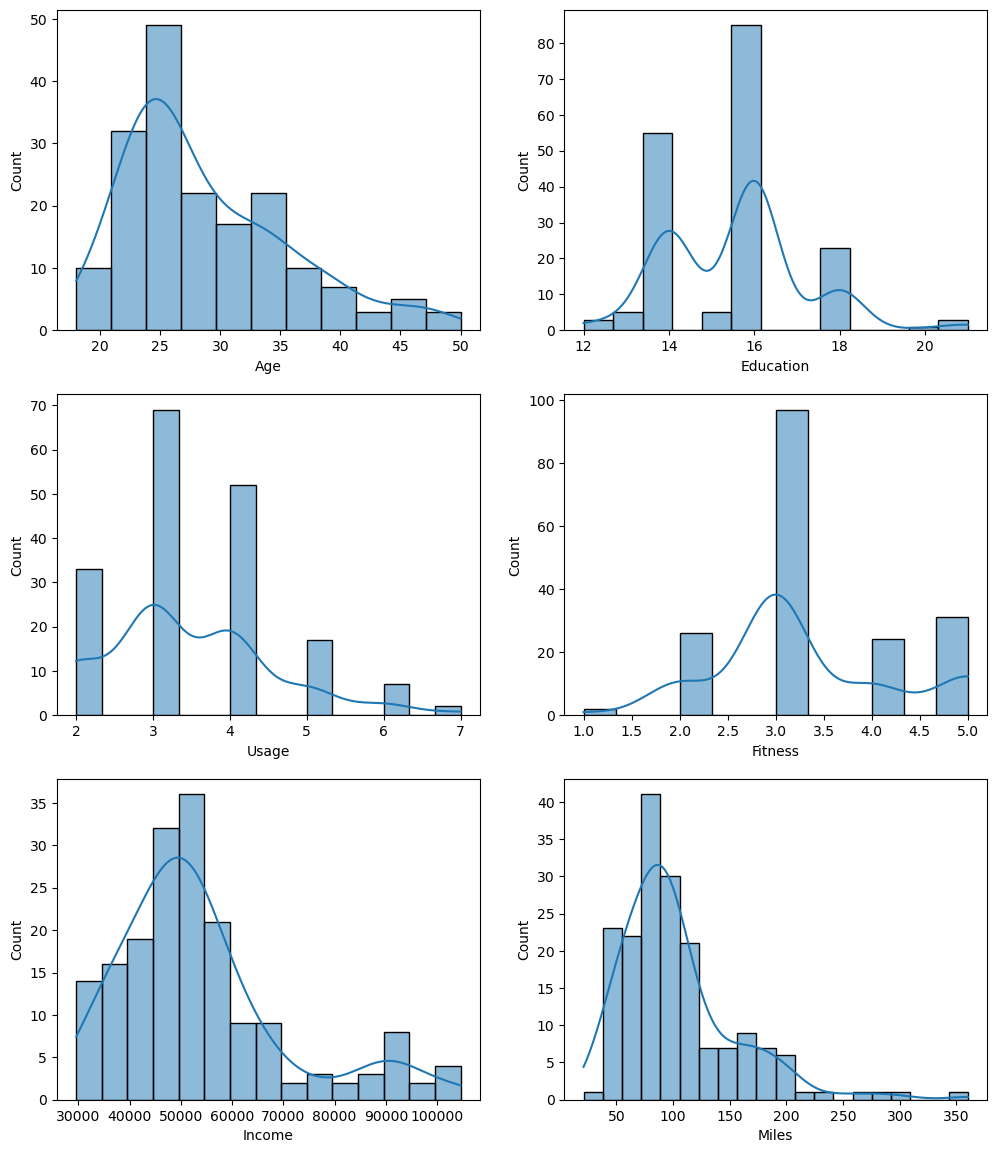

In [17]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

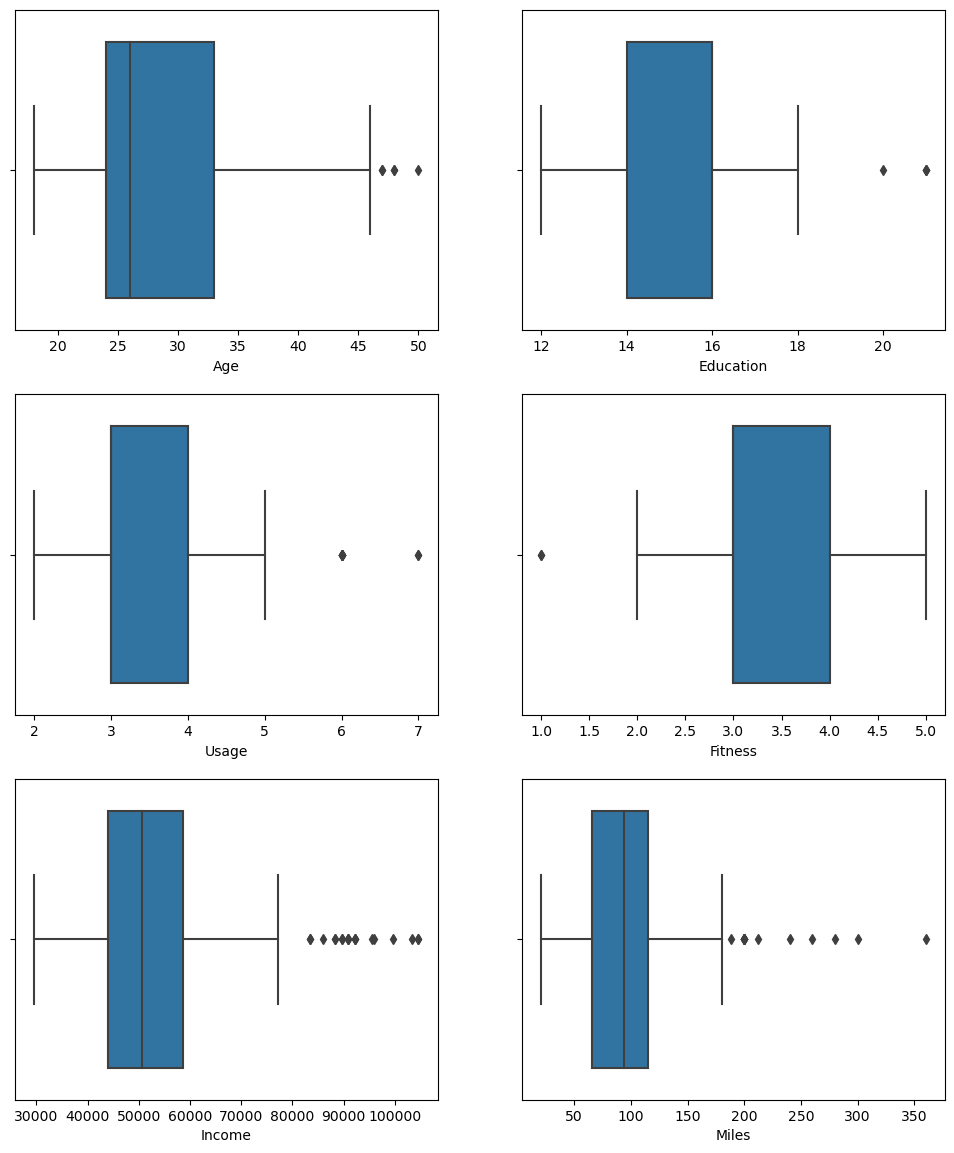

In [18]:
#outiler detection
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

Based on the observations:

1. **Outliers**: 
   - Age, Education, and Usage have relatively few outliers based on boxplots.
   - Income and Miles exhibit more outliers, indicating significant variability in these metrics among customers.

2. **Distribution of Qualitative Attributes**:
   - **Product**: There are 3 unique products in the dataset, each presumably representing different types of treadmills or related products.
   - **Gender**: The dataset includes two genders: Male and Female.
   - **MaritalStatus**: This attribute likely includes categories such as Married, Single, Divorced, etc., though specific details on distribution aren't provided.

Understanding the distribution of these qualitative attributes helps in segmenting and profiling customers more effectively. Further analysis could explore how these attributes relate to each other and to customer behaviors and preferences, aiding in targeted marketing and product recommendations.

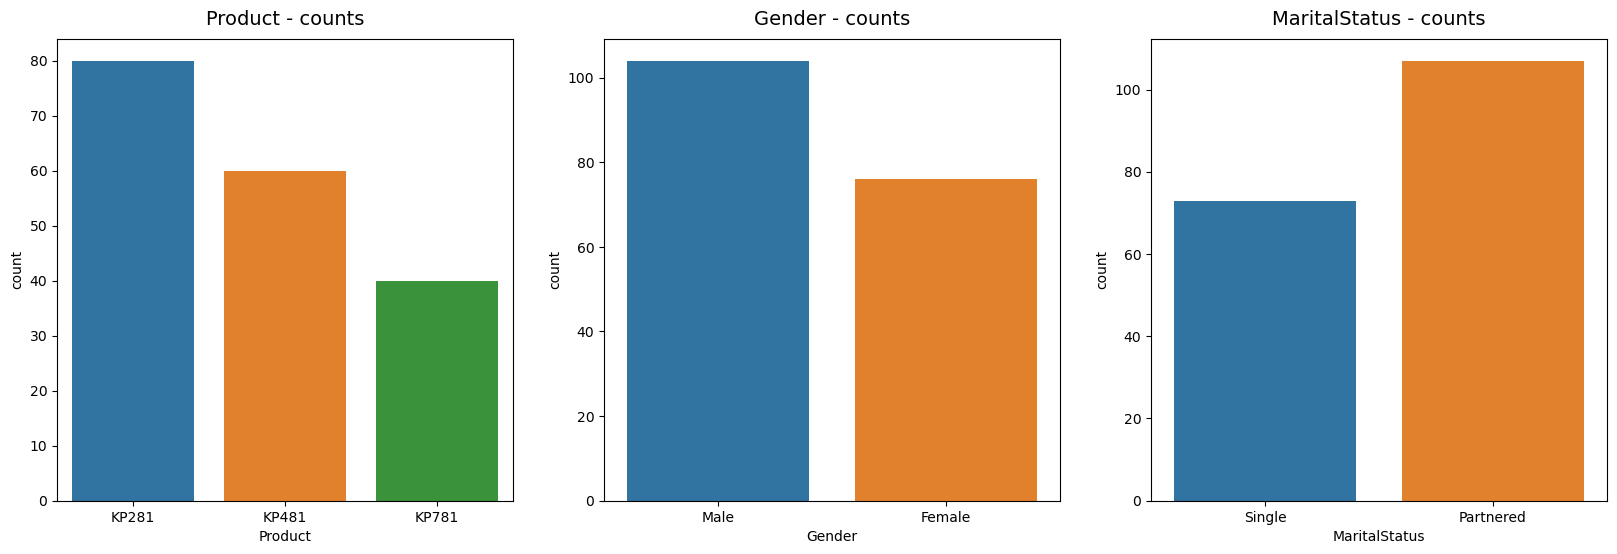

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)
plt.show()

Based on the observations:

1. **Product Frequency**:
   - KP281 is the most frequently occurring product among the dataset.

2. **Gender Distribution**:
   - There are more males than females in the dataset.

3. **Marital Status**:
   - There are more partnered individuals (presumably married or in a relationship) compared to single individuals.

Normalized counts for each variable (assuming these are proportions or percentages within the dataset) would provide precise figures for these observations, helping to understand the relative distribution of each category within the data. These insights are foundational for understanding customer demographics and can guide targeted marketing strategies and product recommendations accordingly.

In [20]:
df1 = df[['Product', 'Gender', 'MaritalStatus']].melt()
df1.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

Based on the observations provided:

1. **Product Distribution**:
   - 44.44% of customers have purchased the KP2821 product.
   - 33.33% of customers have purchased the KP481 product.
   - 22.22% of customers have purchased the KP781 product.

2. **Gender Distribution**:
   - 57.78% of customers are male.

3. **Marital Status Distribution**:
   - 59.44% of customers are partnered (presumably married or in a relationship).

These percentages provide a clear breakdown of how customers are distributed across different products, genders, and marital status categories within the dataset. Understanding these distributions is crucial for targeted marketing strategies and product recommendations tailored to different customer segments.

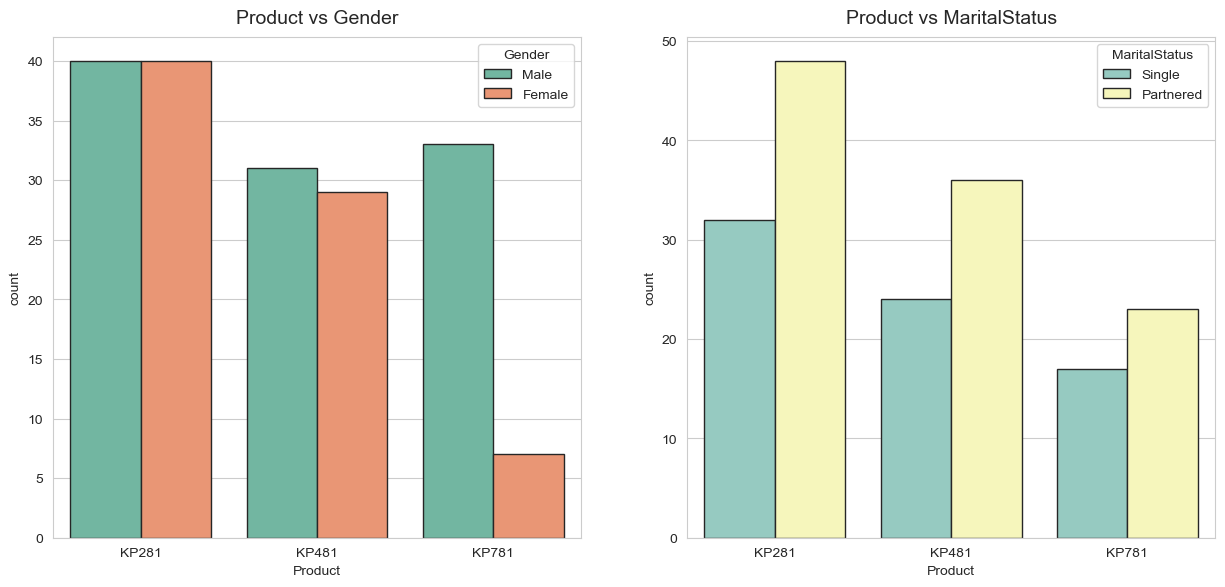

In [21]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", palette='Set2', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set3', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

Based on the observations:

1. **Product vs Gender**:
   - An equal number of males and females have purchased the KP281 product.
   - Similarly, the distribution is almost equal for the KP481 product between males and females.
   - Most male customers have purchased the KP781 product.

2. **Product vs Marital Status**:
   - Customers who are partnered (married or in a relationship) are more likely to purchase the product.

These observations highlight the relationship between product purchases and demographic factors such as gender and marital status. They indicate potential preferences or behaviors among different customer segments, which can be valuable for targeted marketing and product positioning strategies.

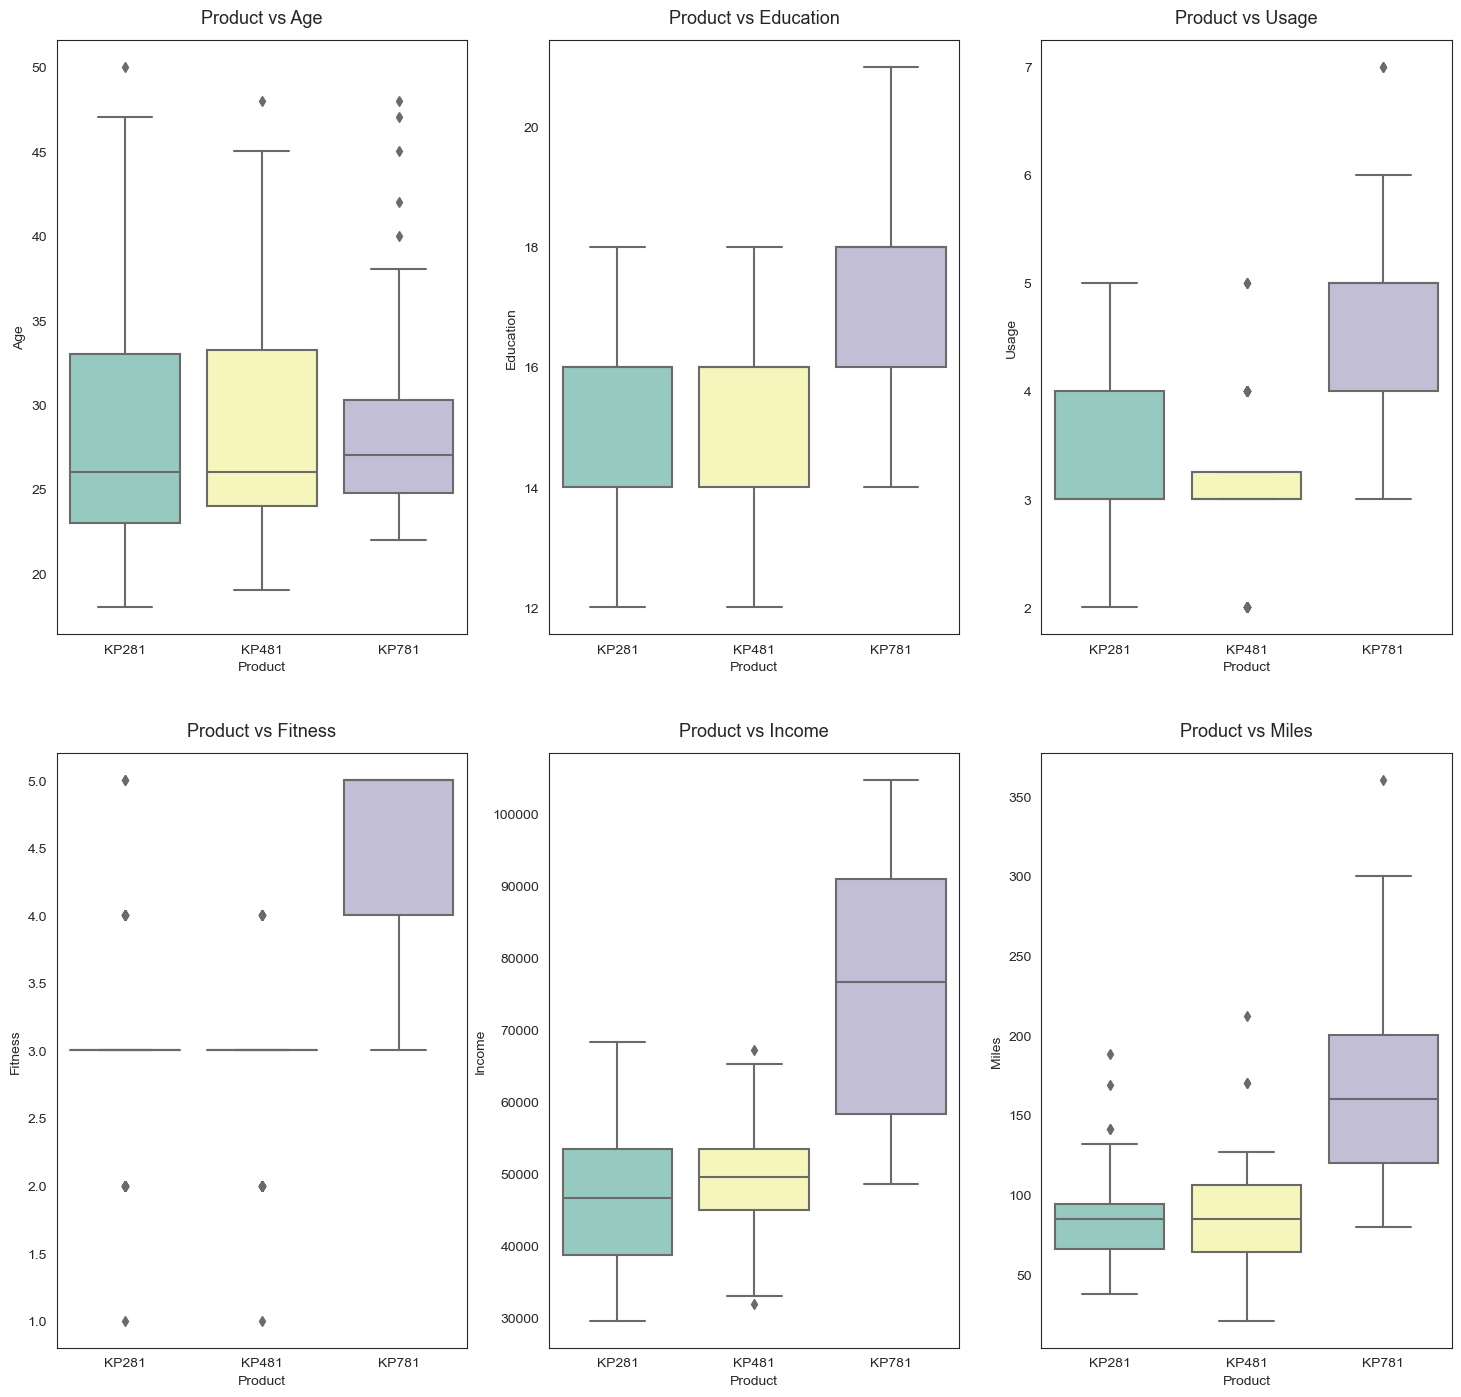

In [22]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attrs[count], ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

Based on the observations regarding product versus different variables:

1. **Product vs Age**:
   - Customers purchasing products KP281 and KP481 have the same median age value.
   - Customers aged between 25-30 are more likely to buy the KP781 product.

2. **Product vs Education**:
   - Customers with an education level greater than 16 are more likely to purchase the KP781 product.
   - Customers with an education level less than or equal to 16 have an equal likelihood of purchasing KP281 or KP481.

3. **Product vs Usage**:
   - Customers planning to use the treadmill more than 4 times a week are more likely to purchase the KP781 product.
   - Other customers are likely to purchase KP281 or KP481.

4. **Product vs Fitness**:
   - Customers with a higher fitness level (fitness >= 3) are more likely to purchase the KP781 product.

5. **Product vs Income**:
   - Customers with higher incomes (Income >= 60000) are more likely to purchase the KP781 product.

6. **Product vs Miles**:
   - Customers expecting to walk/run more than 120 miles per week are more likely to buy the KP781 product.

These insights reveal distinct preferences and behaviors among customers based on their age, education, usage intentions, fitness level, income, and expected mileage. They provide valuable guidance for targeting specific customer segments with appropriate marketing strategies and product recommendations.

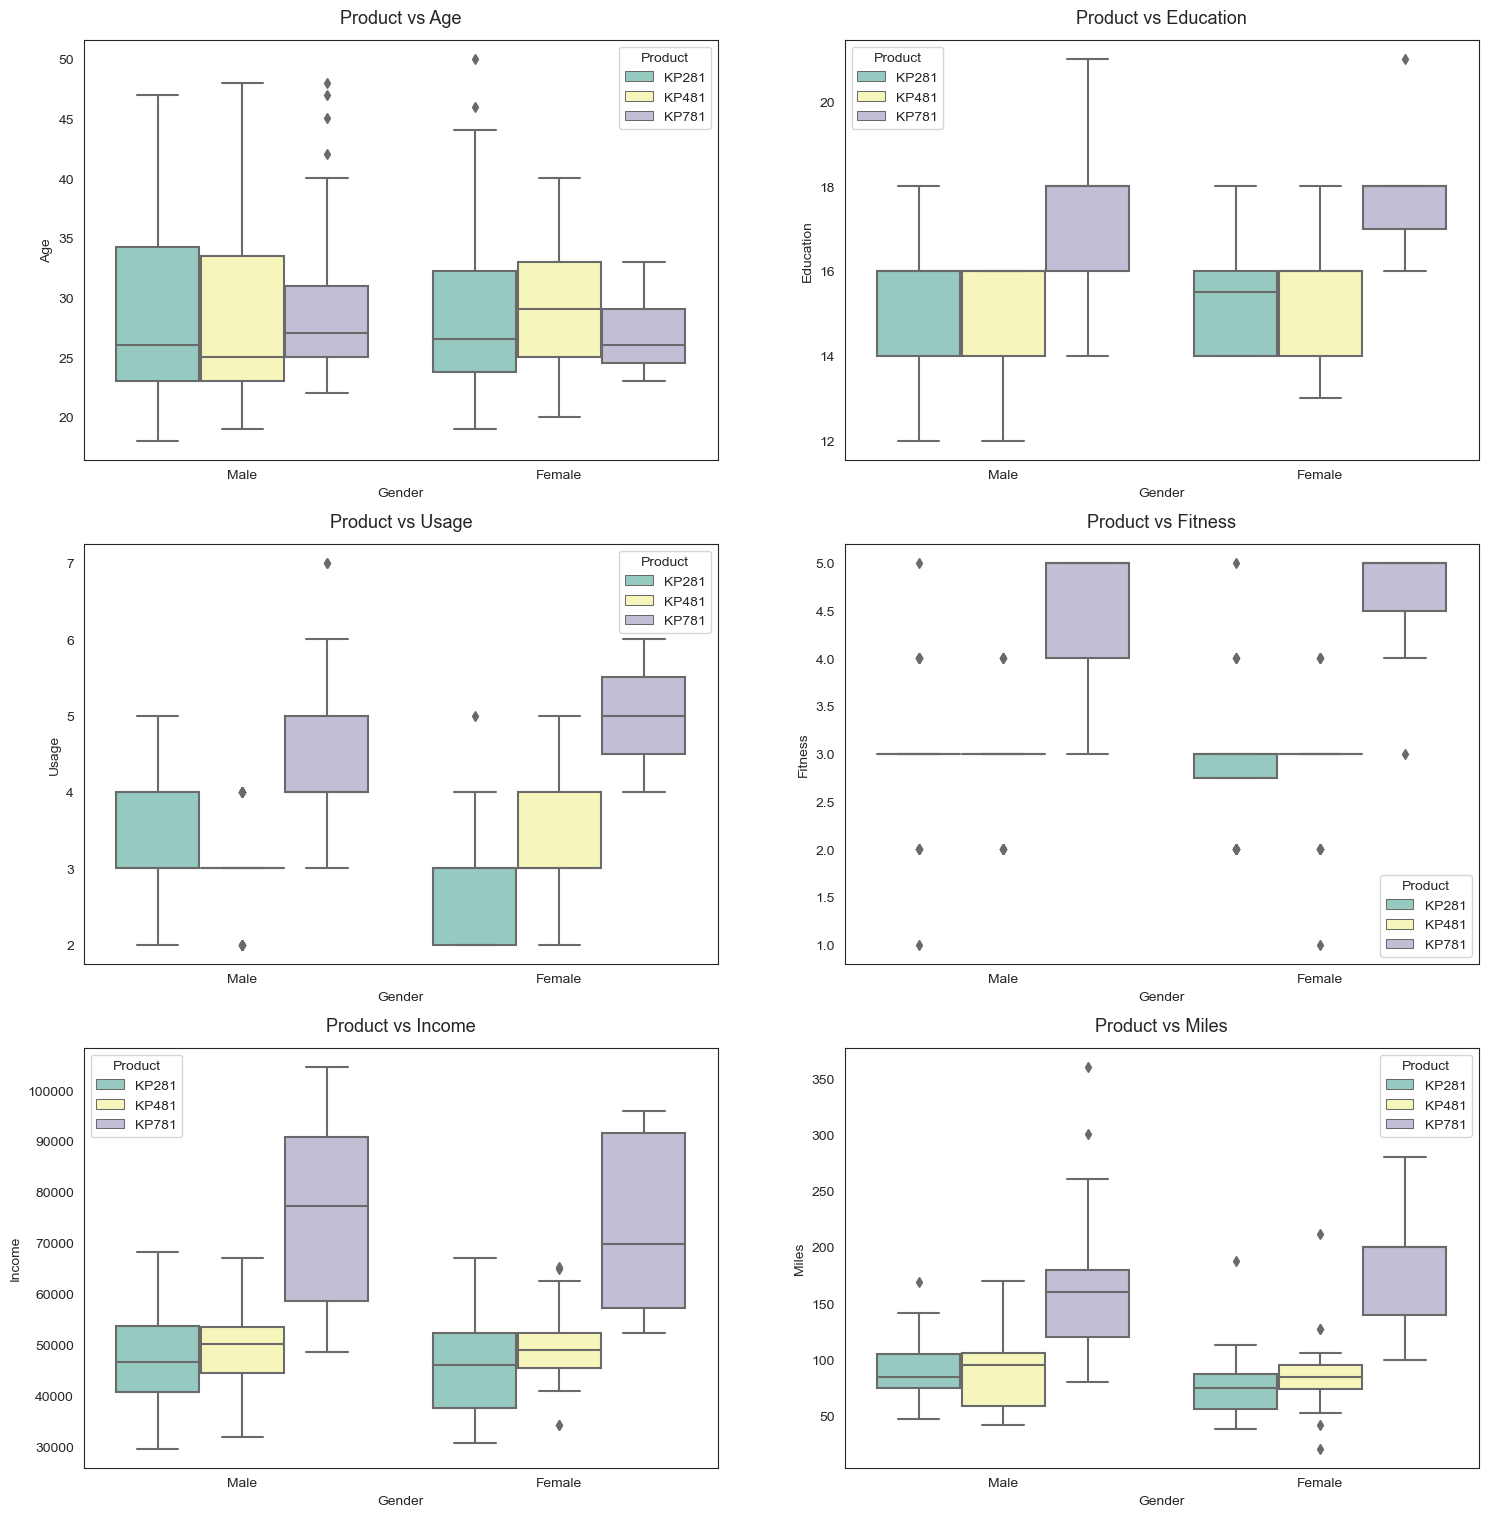

In [23]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attrs[count], hue='Product', ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

Females planning to use treadmill 3-4 times a week, are more likely to buy KP481 product

In [24]:
df['Product'].value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

In [29]:
#Probability of each product given gender

def p_prod_given_gender(gender, print_marginal=False):
    if gender !="Female" and gender !="Male":
        return "Invalid gender value."
    
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")
    
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



In [30]:
#Probability of each product given marital status

def p_prod_given_mstatus(status, print_marginal=False):
    if status !="Single" and status !="Partnered":
        return "Invalid marital status value."
    
    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781'][status] / df1.loc[status].sum()
    p_481 = df1['KP481'][status] / df1.loc[status].sum()
    p_281 = df1['KP281'][status] / df1.loc[status].sum()
    
    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{status}): {p_781:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP281/{status}): {p_281:.2f}\n")
    
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



In [31]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
